In [12]:
from sklearn.datasets import make_regression

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [13]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [14]:
plt.scatter(X,y)

<IPython.core.display.Javascript object>

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [24]:
b = -150
m = 27.82
lr = 0.001

all_b = []
all_cost = []

epochs = 30
n = X.shape[0]

for i in range(epochs):
    slope = 0
    cost = 0

    for j in range(n):
        error = y[j] - (m * X[j] + b)
        slope += -2 * error
        cost += error ** 2

    slope = slope / n          # 🔑 FIX
    cost = cost / n            # 🔑 FIX

    b = b - lr * slope

    all_b.append(b)
    all_cost.append(cost)


In [17]:
all_b = np.array(all_b).ravel()

In [18]:
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [19]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

num_epochs = list(range(1,31))
len(num_epochs)

In [23]:
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim=(0, len(all_cost)+1),
                ylim=(0, max(all_cost)*1.1))

line, = axis.plot([], [], lw=2)
xdata, ydata = [], []

def animate(i):
    xdata.append(i + 1)          # epoch number
    ydata.append(all_cost[i])    # cost value
    line.set_data(xdata, ydata)
    axis.set_xlabel(f"Epoch {i+1}")
    return line,

anim = animation.FuncAnimation(
    fig,
    animate,
    frames=len(all_cost),   # 🔑 FIX
    repeat=False,
    interval=500
)

writergif = animation.PillowWriter(fps=2)
anim.save("animations/animation1.gif", writer=writergif)


<IPython.core.display.Javascript object>

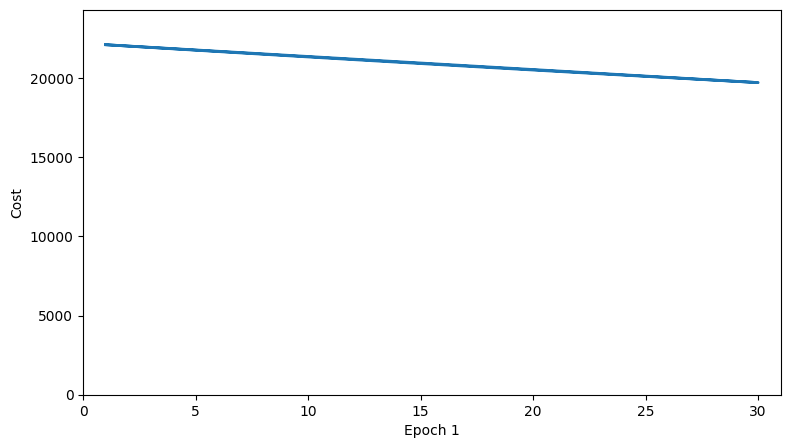

In [25]:
# switch backend when saving
%matplotlib inline

fig = plt.figure(figsize=(9,5))
axis = plt.axes(
    xlim=(0, len(all_cost) + 1),
    ylim=(0, max(all_cost) * 1.1)
)

line, = axis.plot([], [], lw=2)
xdata, ydata = [], []

def animate(i):
    xdata.append(i + 1)          # epoch number
    ydata.append(all_cost[i])    # cost value
    line.set_data(xdata, ydata)
    axis.set_xlabel(f"Epoch {i+1}")
    axis.set_ylabel("Cost")
    return line,

anim = animation.FuncAnimation(
    fig,
    animate,
    frames=len(all_cost),    # 🔑 CRITICAL FIX
    repeat=False,
    interval=500
)

writergif = animation.PillowWriter(fps=2)
anim.save("animation1.gif", writer=writergif)


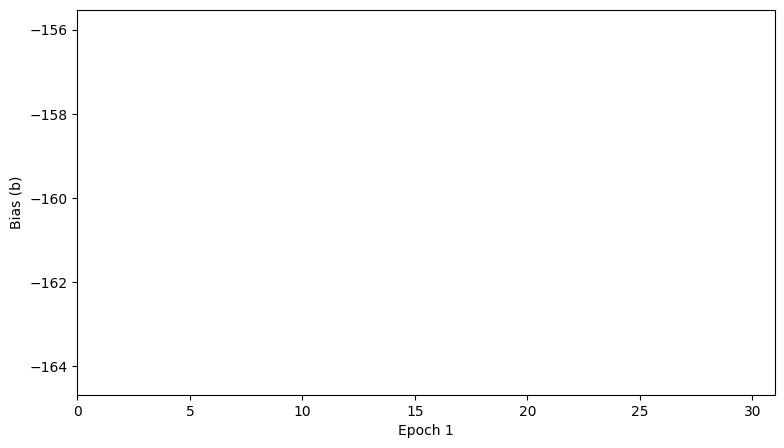

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(9,5))
axis = plt.axes(
    xlim=(0, len(all_b) + 1),
    ylim=(min(all_b) * 1.1, max(all_b) * 1.1)
)

line, = axis.plot([], [], lw=2)
xdata, ydata = [], []

def animate(i):
    xdata.append(i + 1)      # epoch number
    ydata.append(all_b[i])   # bias value
    line.set_data(xdata, ydata)
    axis.set_xlabel(f"Epoch {i+1}")
    axis.set_ylabel("Bias (b)")
    return line,

anim = animation.FuncAnimation(
    fig,
    animate,
    frames=len(all_b),   # 🔑 CRITICAL FIX
    repeat=False,
    interval=500
)

writergif = animation.PillowWriter(fps=2)
anim.save("animation2.gif", writer=writergif)


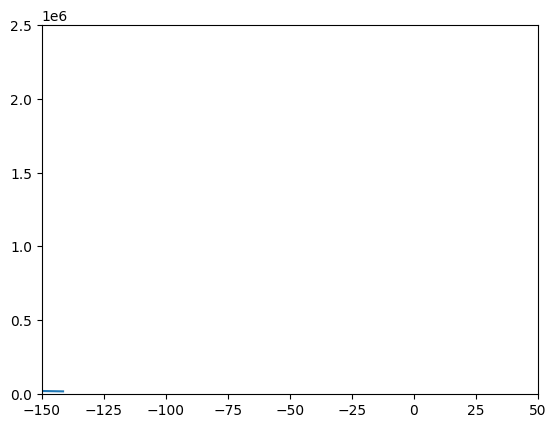

In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

In [ ]:
b_input = np.linspace(-150,150,100)

In [31]:
cost_input = []

for i in range(len(b_input)):
    this_cost = 0 
    for j in range(X.shape[0]):
        this_cost += (y[j] - m*X[j] - b_input[i])**2

    cost_input.append(this_cost)

len(cost_input) == len(b_input)



NameError: name 'b_input' is not defined